In [ ]:
#Classifying reuters dataset

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import reuters

# Load dataset (top 10,000 most common words only)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")
print(f"Number of classes: {np.max(y_train) + 1}")

# View the first article (as a list of word indexes)
print("First article (word indexes):", x_train[0])

# View its label
print("First article label (category):", y_train[0])

# Decode the article (convert word indexes into words)
word_index = reuters.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Decode first article
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])
print("\nDecoded article:\n", decoded_newswire)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 8982
Testing samples: 2246
Number of classes: 46
First article (word indexes): [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
First article label (category): 3
550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Decoded article:
 ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [30]:
# Function to vectorize input
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

# Vectorize articles
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(10000,)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=512,
    validation_split=0.2, # 20% of training data for validation
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
15/15 - 5s - 307ms/step - accuracy: 0.4569 - loss: 2.6142 - val_accuracy: 0.6422 - val_loss: 1.6011
Epoch 2/30
15/15 - 3s - 185ms/step - accuracy: 0.6519 - loss: 1.5288 - val_accuracy: 0.7140 - val_loss: 1.2907
Epoch 3/30
15/15 - 5s - 335ms/step - accuracy: 0.7317 - loss: 1.1608 - val_accuracy: 0.7551 - val_loss: 1.1111
Epoch 4/30
15/15 - 5s - 342ms/step - accuracy: 0.7926 - loss: 0.8995 - val_accuracy: 0.7769 - val_loss: 1.0237
Epoch 5/30
15/15 - 3s - 192ms/step - accuracy: 0.8287 - loss: 0.7145 - val_accuracy: 0.7885 - val_loss: 0.9777
Epoch 6/30
15/15 - 6s - 384ms/step - accuracy: 0.8651 - loss: 0.5658 - val_accuracy: 0.7980 - val_loss: 0.9291
Epoch 7/30
15/15 - 3s - 190ms/step - accuracy: 0.8885 - loss: 0.4693 - val_accuracy: 0.8114 - val_loss: 0.9106
Epoch 8/30
15/15 - 3s - 185ms/step - accuracy: 0.9126 - loss: 0.3709 - val_accuracy: 0.8063 - val_loss: 0.9459
Epoch 9/30
15/15 - 3s - 182ms/step - accuracy: 0.9271 - loss: 0.3046 - val_accuracy: 0.8152 - val_loss: 0.9409
E

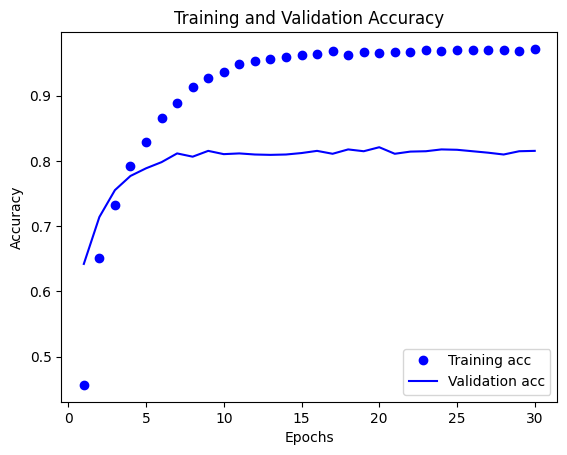

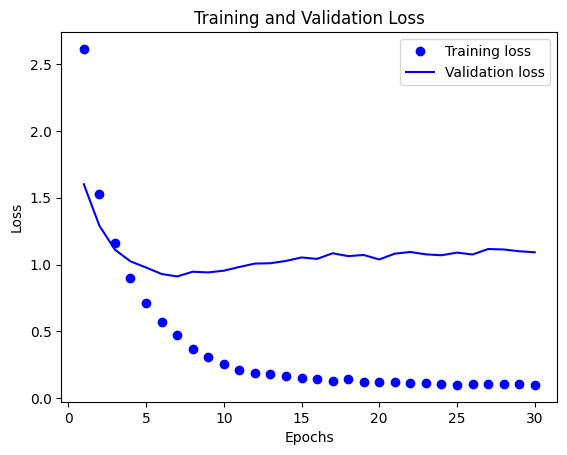

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()